In [ ]:
! pip install sklearn
! pip install seaborn
! pip install matplotlib
! pip install cvxopt

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import cvxopt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()  # for plot styling

# Собственная реализация

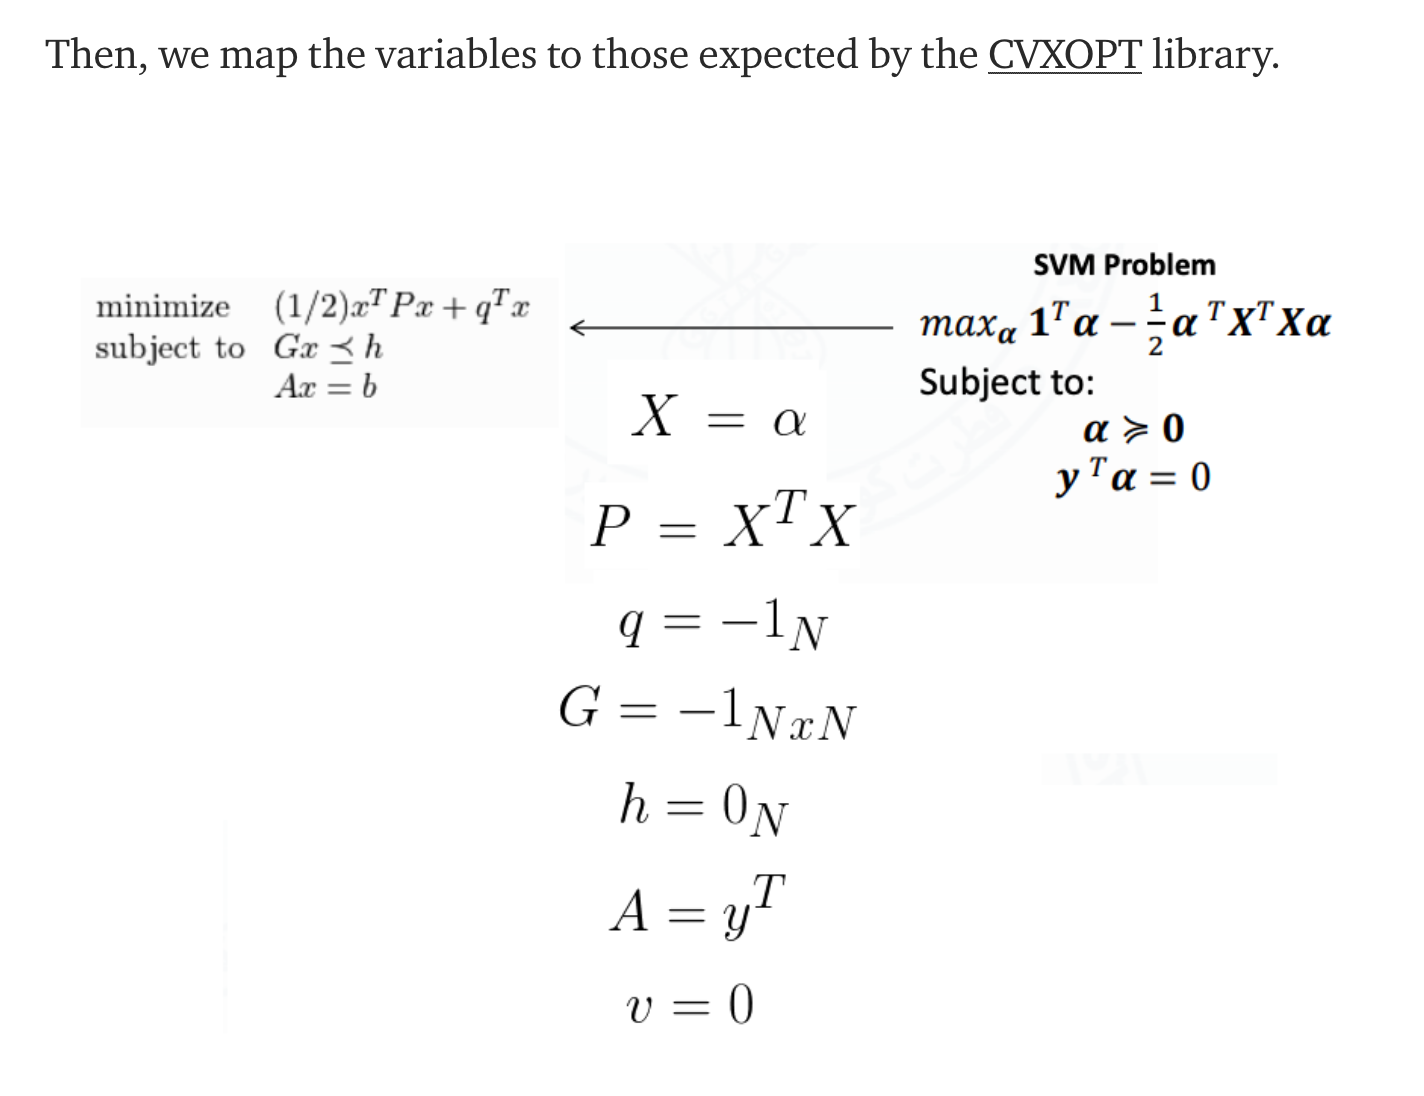

In [2]:
from IPython.display import Image
Image("/Users/d.merkushov/Desktop/conv.png")

In [2]:
X, y = make_blobs(n_samples=250, centers=2,
                  random_state=0, cluster_std=0.6)
y[y == 0] = -1
tmp = np.ones(len(X))
y = tmp * y

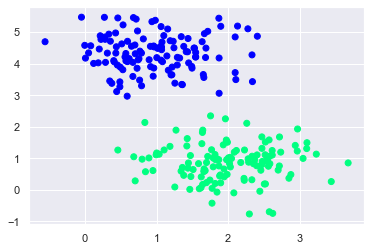

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')

In [21]:
class LinearSVM():
    def __init__(self, C=1, gamma=1):
        self._C = C
        self._gamma = gamma
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = np.dot(X[i], X[j]) # матрица линейных ядер
        # P = X^T X
        P = cvxopt.matrix(np.outer(y, y) * K) # Q(yi, yj, K(xi, xj))
        # q = -1 (1xN)
        q = cvxopt.matrix(np.ones(n_samples) * -self._C) # Ce
        # A = y^T
        A = cvxopt.matrix(y, (1, n_samples)) # второе условие
        # b = 0 
        b = cvxopt.matrix(0.0) # правая сторона второго условия
        # -1 (NxN)
        G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1)) 
        # 0 (1xN)
        h = cvxopt.matrix(np.zeros(n_samples))
    
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    
        # Множители Лагранжа
        a = np.ravel(solution['x'])
        idx = a > 1e-5
        idx = np.arange(len(a))[idx]
        
        self.a = a[idx]
        self.sv = X[idx]
        self.sv_y = y[idx]
        
        print len(idx)

        self.w = np.zeros(n_features)
        for n in range(len(self.a)):
            self.w += self.a[n] * self.sv_y[n] * self.sv[n]
            
        self.b = 0
        #for n in range(len(self.a)):
        self.b += np.dot(self.w, self.sv[n]) - self.sv_y[n]
    
    def project(self, X):
        return np.dot(X, self.w) - self.b

    def predict(self, X):
        return np.sign(self.project(X))
    
    def plot(self, X):
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        
        x = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 30)
        y = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 30)
        X_, Y_ = np.meshgrid(y, x)

        xy = np.vstack([X_.ravel(), Y_.ravel()]).T
        P = self.project(xy).reshape(X_.shape)

        # plot decision boundary and margins
        ax.contour(X_, Y_, P, colors='k',
                   levels=[-1, 0, 1], alpha=0.5,
                   linestyles=['--', '-', '--'])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

     pcost       dcost       gap    pres   dres
 0: -1.8226e+01 -3.4458e+01  6e+02  2e+01  2e+00
 1: -2.5252e+01 -1.8773e+01  2e+02  9e+00  7e-01
 2: -5.3459e+01 -3.2711e+01  2e+02  7e+00  6e-01
 3: -7.8360e+01 -2.6482e+01  1e+02  4e+00  3e-01
 4: -5.6818e+00 -5.1750e+00  1e+01  2e-01  1e-02
 5: -3.6906e+00 -4.1082e+00  4e-01  2e-15  6e-15
 6: -4.0061e+00 -4.0104e+00  4e-03  9e-16  5e-15
 7: -4.0094e+00 -4.0094e+00  4e-05  9e-16  5e-15
 8: -4.0094e+00 -4.0094e+00  4e-07  1e-15  5e-15
Optimal solution found.
3


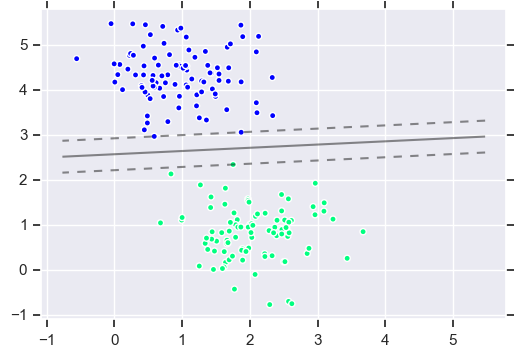

In [23]:
svm = LinearSVM(C=1)
svm.fit(X_train, y_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter')
svm.plot(X_train)

In [24]:
pred = svm.predict(X_test)
target = y_test

In [25]:
from sklearn.metrics import precision_score, accuracy_score, classification_report

print classification_report(target, pred)

             precision    recall  f1-score   support

       -1.0       1.00      1.00      1.00        29
        1.0       1.00      1.00      1.00        34

avg / total       1.00      1.00      1.00        63



# Нелинейный случай

In [26]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

y[y == 0] = -1
tmp = np.ones(len(X))
y = tmp * y

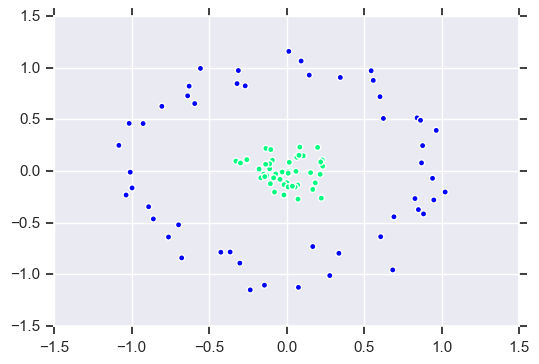

In [27]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [29]:
svm = LinearSVM(C=1)
svm.fit(X_train, y_train)

     pcost       dcost       gap    pres   dres
 0: -7.3881e+01 -1.6766e+02  9e+01  9e-16  2e+00
 1: -1.6297e+02 -1.6702e+02  4e+00  4e-15  1e+00
 2: -6.6850e+03 -6.6899e+03  5e+00  5e-13  1e+00
 3: -9.1175e+06 -9.1176e+06  7e+01  6e-09  1e+00
 4: -2.6146e+11 -2.6146e+11  2e+06  1e-02  1e+00
 5: -4.0273e+11 -4.0273e+11  2e+06  1e-02  1e+00
Terminated (singular KKT matrix).
75


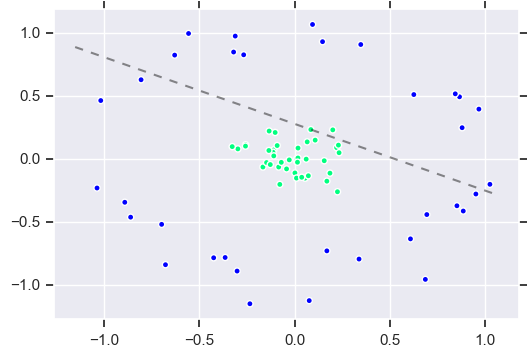

In [30]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter')
svm.plot(X_train)

## Kernel SVM

In [31]:
class KernelSVM:
    def __init__(self, C=1, ker='rbf', gamma=1):
        self._C = C
        self._Ker = self.linear
        if ker=='rbf': self._Ker = self.rbf
        self._gamma = gamma
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self._Ker(X[i], X[j])
        # P = X^T X
        P = cvxopt.matrix(np.outer(y, y) * K)
        # q = -1 (1xN)
        q = cvxopt.matrix(np.ones(n_samples) * -self._C)
        # A = y^T 
        A = cvxopt.matrix(y, (1, n_samples))
        # b = 0 
        b = cvxopt.matrix(0.0)
        # -1 (NxN)
        G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
        # 0 (1xN)
        h = cvxopt.matrix(np.zeros(n_samples))
    
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    
        # Множители Лагранжа
        a = np.ravel(solution['x'])
        idx = a > 1e-5
        idx = np.arange(len(a))[idx]
        
        self.a = a[idx]
        self.sv = X[idx]
        self.sv_y = y[idx]

        self.w = np.zeros(n_features)
        for n in range(len(self.a)):
            self.w += self.a[n] * self.sv_y[n] * self.sv[n]
            
        self.b = 0
        #for n in range(len(self.a)):
        self.b += self._Ker(self.w, self.sv[n]) - self.sv_y[n]
    
    def rbf(self, x, y):
        if len(x.shape) > 1:
            return np.exp(-np.diagonal(np.dot(x-y, (x-y).T)) * self._gamma)
        else: 
            return np.exp(-(np.dot(x-y, (x-y).T)))
        
    def linear(self, x, y):
        return np.dot(x, y.T)
    
    def project(self, X):
        sum = 0
        for n in range(len(self.a)):
            sum += self.a[n] * self.sv_y[n] * self._Ker(X, self.sv[n])
        return sum - self.b

    def predict(self, X):
        return np.sign(self.project(X))
    
    def plot(self, X):
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        
        x = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 30)
        y = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 30)
        X_, Y_ = np.meshgrid(y, x)

        xy = np.vstack([X_.ravel(), Y_.ravel()]).T
        P = self.project(xy).reshape(X_.shape)

        # plot decision boundary and margins
        ax.contour(X_, Y_, P, colors='k',
                   levels=[-1, 0, 1], alpha=0.5,
                   linestyles=['--', '-', '--'])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

     pcost       dcost       gap    pres   dres
 0: -5.8504e+00 -1.7247e+01  1e+02  1e+01  2e+00
 1: -1.7817e+00 -1.7161e+01  2e+01  1e-15  7e-16
 2: -5.1585e+00 -1.1303e+01  6e+00  7e-16  7e-16
 3: -8.2345e+00 -1.0074e+01  2e+00  1e-15  1e-15
 4: -9.1620e+00 -9.4509e+00  3e-01  2e-15  1e-15
 5: -9.3555e+00 -9.3785e+00  2e-02  5e-15  1e-15
 6: -9.3749e+00 -9.3754e+00  5e-04  4e-15  1e-15
 7: -9.3753e+00 -9.3753e+00  1e-05  4e-15  1e-15
 8: -9.3753e+00 -9.3753e+00  1e-07  4e-15  1e-15
Optimal solution found.


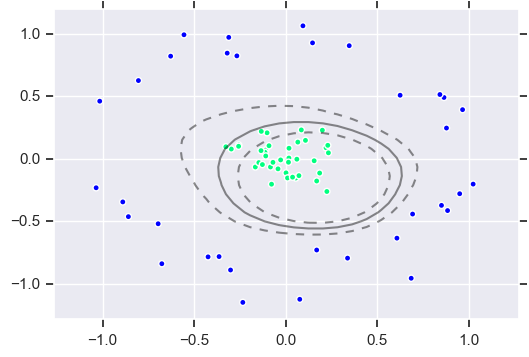

In [39]:
svm = KernelSVM(C=1, ker='rbf',gamma=5)
svm.fit(X_train, y_train)

svm.plot(X)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter')

In [34]:
pred = svm.predict(X_test)
target = y_test

In [35]:
from sklearn.metrics import precision_score, accuracy_score, classification_report

print classification_report(target, pred)

             precision    recall  f1-score   support

       -1.0       1.00      1.00      1.00        16
        1.0       1.00      1.00      1.00         9

avg / total       1.00      1.00      1.00        25



# SVM как качественный классификатор

In [40]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


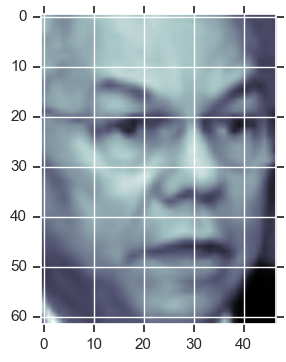

In [41]:
plt.imshow(faces.images[0], cmap='bone')

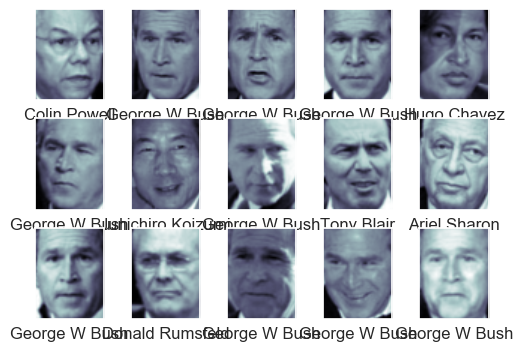

In [42]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [43]:
X = faces.data
y = faces.target

In [44]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                random_state=42)

In [45]:
from sklearn.svm import SVC
svm = SVC(C=10, gamma=0.001, kernel='rbf', class_weight='balanced')
svm.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [46]:
pred = svm.predict(X_test)
target = y_test

In [47]:
from sklearn.metrics import precision_score, accuracy_score, classification_report

print classification_report(target, pred)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        15
          1       0.00      0.00      0.00        68
          2       0.00      0.00      0.00        31
          3       0.37      1.00      0.54       126
          4       0.00      0.00      0.00        23
          5       0.00      0.00      0.00        20
          6       0.00      0.00      0.00        12
          7       0.00      0.00      0.00        42

avg / total       0.14      0.37      0.20       337



In [48]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                random_state=42)

from sklearn.svm import SVC
svm = SVC(C=10, gamma=0.001, kernel='rbf', class_weight='balanced')
svm.fit(X_train,y_train)

pred = svm.predict(X_test)
target = y_test

from sklearn.metrics import precision_score, accuracy_score, classification_report
print classification_report(target, pred)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        15
          1       0.00      0.00      0.00        68
          2       0.00      0.00      0.00        31
          3       0.37      1.00      0.54       126
          4       0.00      0.00      0.00        23
          5       0.00      0.00      0.00        20
          6       0.00      0.00      0.00        12
          7       0.00      0.00      0.00        42

avg / total       0.14      0.37      0.20       337



# PCA

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=150,whiten=True)
pca.fit(faces.data)
X = pca.transform(faces.data)

In [50]:
X.shape

(1348, 150)

In [51]:
y = faces.target

In [52]:
import random
test_frac = 0.3
num = len(X) * test_frac
ids_test = np.random.choice(xrange(len(X)), int(num))

In [53]:
ids_train = set(np.arange(len(X))) - set(ids_test)
ids_train = np.array(list(ids_train))
print len(ids_train), len(ids_test)

1001 404


In [54]:
X_train = X[ids_train]
y_train = faces.target[ids_train]
X_test = X[ids_test]
y_test = faces.target[ids_test]

In [55]:
from sklearn.svm import SVC
svm = SVC(C=1, gamma=0.001, kernel='rbf', class_weight='balanced')
svm.fit(X_train,y_train)

pred = svm.predict(X_test)
target = y_test

from sklearn.metrics import precision_score, accuracy_score, classification_report
print classification_report(target, pred)

             precision    recall  f1-score   support

          0       0.69      0.82      0.75        22
          1       0.78      0.71      0.74        63
          2       0.73      0.87      0.80        38
          3       0.89      0.86      0.87       145
          4       0.78      0.91      0.84        32
          5       0.83      0.88      0.86        34
          6       1.00      0.94      0.97        16
          7       0.83      0.74      0.78        54

avg / total       0.83      0.83      0.83       404



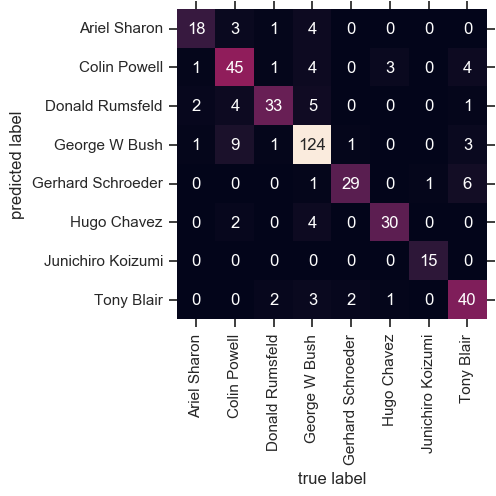

In [56]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(target, pred)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Draw Misclassification

In [57]:
mask = np.logical_and(pred==3, target==1)
ids_misclf = ids_test[mask]

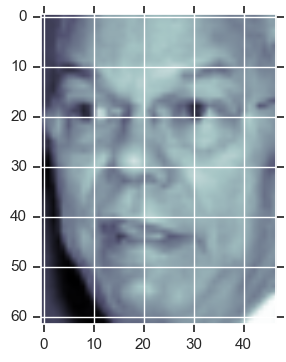

In [62]:
pic = faces.images[ids_misclf[1]]
plt.imshow(pic, cmap='bone')

## Self kernelSVM

In [63]:
y = faces.target == 1
y = np.array([1. if j else -1. for j in y])

In [64]:
X_train = X[ids_train]
y_train = y[ids_train]
X_test = X[ids_test]
y_test = y[ids_test]

In [65]:
svm = KernelSVM(C=10, gamma=0.001, ker='rbf')
svm.fit(X_train,y_train)

pred = svm.predict(X_test)
target = y_test

from sklearn.metrics import precision_score, accuracy_score, classification_report
print classification_report(target, pred)

     pcost       dcost       gap    pres   dres
 0: -2.2432e+04 -3.4909e+04  1e+04  4e-13  9e-01
 1: -2.9732e+04 -2.9963e+04  2e+02  7e-13  8e-02
 2: -2.9909e+04 -2.9911e+04  2e+00  4e-13  3e-04
 3: -2.9909e+04 -2.9909e+04  2e-02  4e-13  3e-06
 4: -2.9909e+04 -2.9909e+04  2e-04  1e-12  3e-08
Optimal solution found.
             precision    recall  f1-score   support

       -1.0       0.95      0.94      0.94       341
        1.0       0.68      0.75      0.71        63

avg / total       0.91      0.91      0.91       404



# Cross Validation

In [ ]:
y = faces.target

In [ ]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                random_state=42)

In [ ]:

import itertools

best_model = None
best_f1 = 0
best_params = None

grid = {'C': [1, 50],
              'gamma': [0.001, 0.1]}

for c,gamma in itertools.product(grid['C'], grid['gamma']):
    svm = SVC(C=c, gamma=gamma, kernel='rbf', class_weight='balanced')
    svm.fit(X_train, y_train)
    
    pred = svm.predict(X_val)
    target = y_val

    from sklearn.metrics import precision_score, accuracy_score, classification_report, f1_score
    score = f1_score(target, pred, average='macro')
    if score > best_f1:
        best_f1 = score
        best_model = svm
        best_params = (c, gamma)
        
print best_params, best_f1

In [ ]:
pred = best_model.predict(X_test)
target = y_test

from sklearn.metrics import precision_score, accuracy_score, classification_report
print classification_report(target, pred)